In [ ]:
!pip install gdown
!pip install tensorflow-gpu

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from pandas.plotting import register_matplotlib_converters

%matplotlib inline
%config InlineBackend.figure_format='retina'

register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 22, 10

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

In [ ]:
!gdown --id 1PScwilohnTYliPWOlF9w2yz0acRi5Icg --output Operations-Dem-Planning_-BikeShare_transformed_dataset.csv

Downloading...
From: https://drive.google.com/uc?id=1PScwilohnTYliPWOlF9w2yz0acRi5Icg
To: /content/Operations-Dem-Planning_-BikeShare_transformed_dataset.csv
100% 1.37M/1.37M [00:00<00:00, 88.7MB/s]


In [ ]:
bike = pd.read_csv(
  "Operations-Dem-Planning_-BikeShare_transformed_dataset.csv", 
  parse_dates=['Date'], 
  index_col="Date"
)

In [ ]:
bike.shape

(17379, 18)

In [ ]:
bike.head

<bound method NDFrame.head of             Instant  Riders  Season  ...  Season_Name  Day_of_Week  Weather_Name_Type
Date                                 ...                                             
2011-01-01        1      16       1  ...       Winter          Sat              Sunny
2011-01-01        2      40       1  ...       Winter          Sat              Sunny
2011-01-01        3      32       1  ...       Winter          Sat              Sunny
2011-01-01        4      13       1  ...       Winter          Sat              Sunny
2011-01-01        5       1       1  ...       Winter          Sat              Sunny
...             ...     ...     ...  ...          ...          ...                ...
2012-12-31    17375     119       1  ...       Winter          Mon             Cloudy
2012-12-31    17376      89       1  ...       Winter          Mon             Cloudy
2012-12-31    17377      90       1  ...       Winter          Mon              Sunny
2012-12-31    17378     

In [ ]:
bike.dtypes

Instant                int64
Riders                 int64
Season                 int64
Month                  int64
Hour                   int64
Holiday                int64
Weekday                int64
Workday                int64
Weather                int64
Temperature            int64
Humidity             float64
Wind                 float64
Year                   int64
Day                    int64
Month_Name            object
Season_Name           object
Day_of_Week           object
Weather_Name_Type     object
dtype: object

In [ ]:
bike['Day_of_Week']=bike['Day_of_Week'].astype(np.object)
print(bike['Day_of_Week'])

Date
2011-01-01    Sat
2011-01-01    Sat
2011-01-01    Sat
2011-01-01    Sat
2011-01-01    Sat
             ... 
2012-12-31    Mon
2012-12-31    Mon
2012-12-31    Mon
2012-12-31    Mon
2012-12-31    Mon
Name: Day_of_Week, Length: 17379, dtype: object


In [ ]:
bike['Riders']=bike['Riders'].astype(np.int64)
print(bike['Riders'])

Date
2011-01-01     16
2011-01-01     40
2011-01-01     32
2011-01-01     13
2011-01-01      1
             ... 
2012-12-31    119
2012-12-31     89
2012-12-31     90
2012-12-31     61
2012-12-31     49
Name: Riders, Length: 17379, dtype: int64


In [ ]:
bike['Temperature']=bike['Temperature'].astype(np.float64)
print(bike['Temperature'])

Date
2011-01-01    37.0
2011-01-01    36.0
2011-01-01    36.0
2011-01-01    37.0
2011-01-01    37.0
              ... 
2012-12-31    34.0
2012-12-31    34.0
2012-12-31    34.0
2012-12-31    36.0
2012-12-31    36.0
Name: Temperature, Length: 17379, dtype: float64


In [ ]:
bike.dtypes

Instant                int64
Riders                 int64
Season                 int64
Month                  int64
Hour                   int64
Holiday                int64
Weekday                int64
Workday                int64
Weather                int64
Temperature          float64
Humidity             float64
Wind                 float64
Year                   int64
Day                    int64
Month_Name            object
Season_Name           object
Day_of_Week           object
Weather_Name_Type     object
dtype: object

In [ ]:
print(bike)

            Instant  Riders  Season  ...  Season_Name  Day_of_Week  Weather_Name_Type
Date                                 ...                                             
2011-01-01        1    16.0       1  ...       Winter          Sat              Sunny
2011-01-01        2    40.0       1  ...       Winter          Sat              Sunny
2011-01-01        3    32.0       1  ...       Winter          Sat              Sunny
2011-01-01        4    13.0       1  ...       Winter          Sat              Sunny
2011-01-01        5     1.0       1  ...       Winter          Sat              Sunny
...             ...     ...     ...  ...          ...          ...                ...
2012-12-31    17375   119.0       1  ...       Winter          Mon             Cloudy
2012-12-31    17376    89.0       1  ...       Winter          Mon             Cloudy
2012-12-31    17377    90.0       1  ...       Winter          Mon              Sunny
2012-12-31    17378    61.0       1  ...       Winter 

In [ ]:
bike['day_of_month'] = bike.index.day
bike['Day_of_Week'] = bike.index.dayofweek
bike['Month'] = bike.index.month

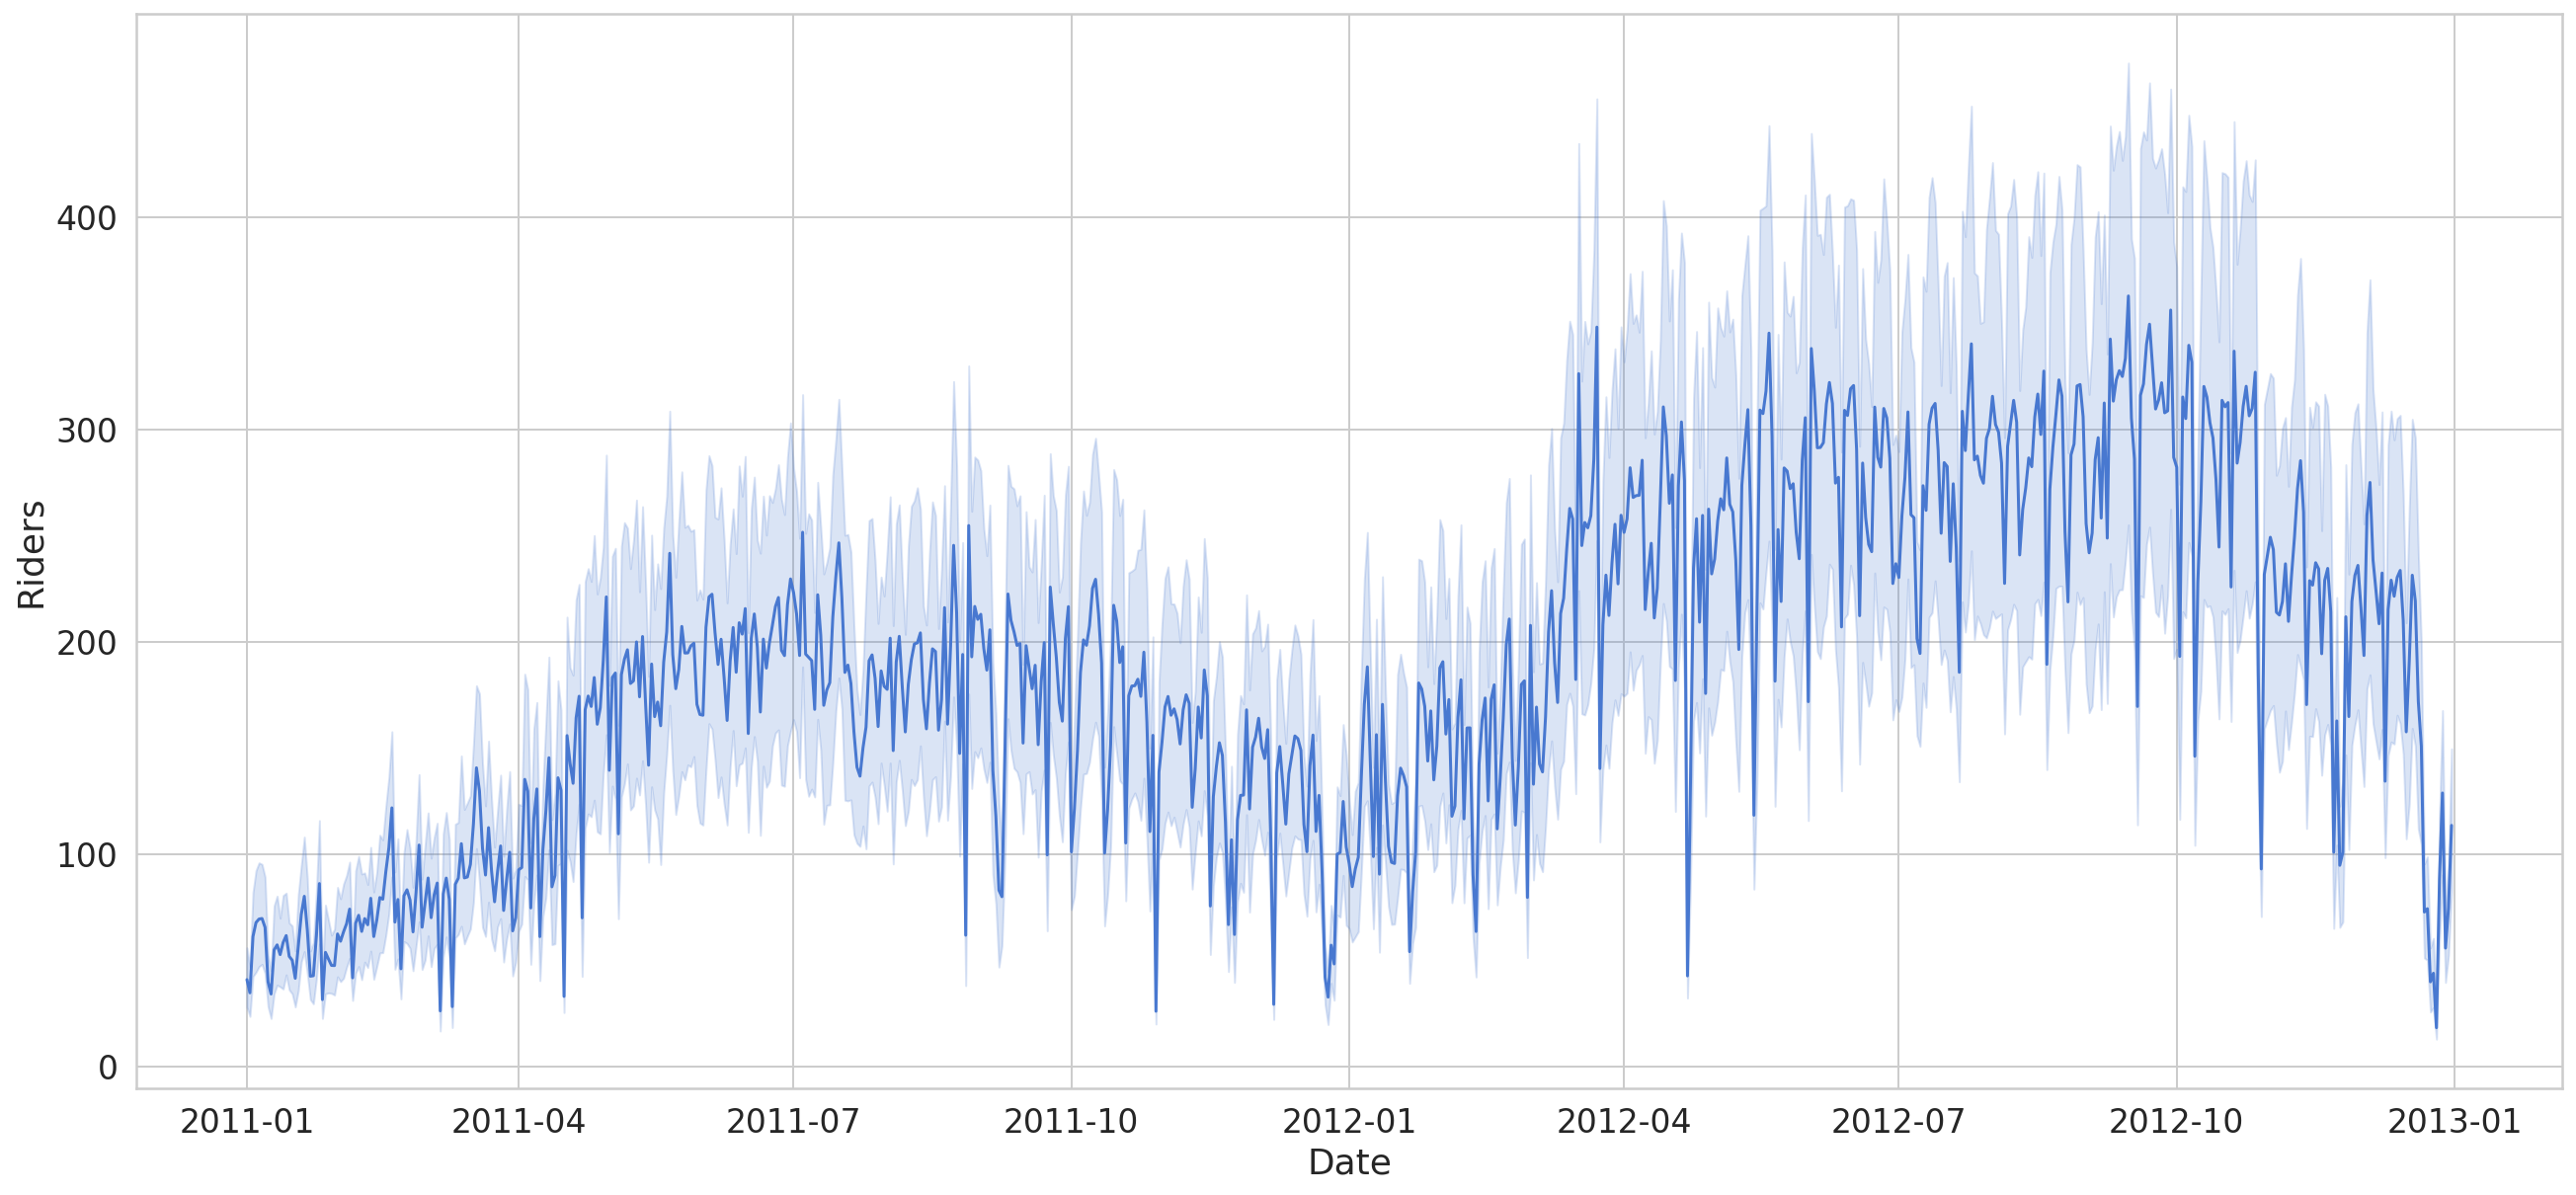

In [ ]:
sns.lineplot(x=bike.index, y="Riders", data=bike);

In [ ]:
bike_by_Month = bike.resample('M').sum()

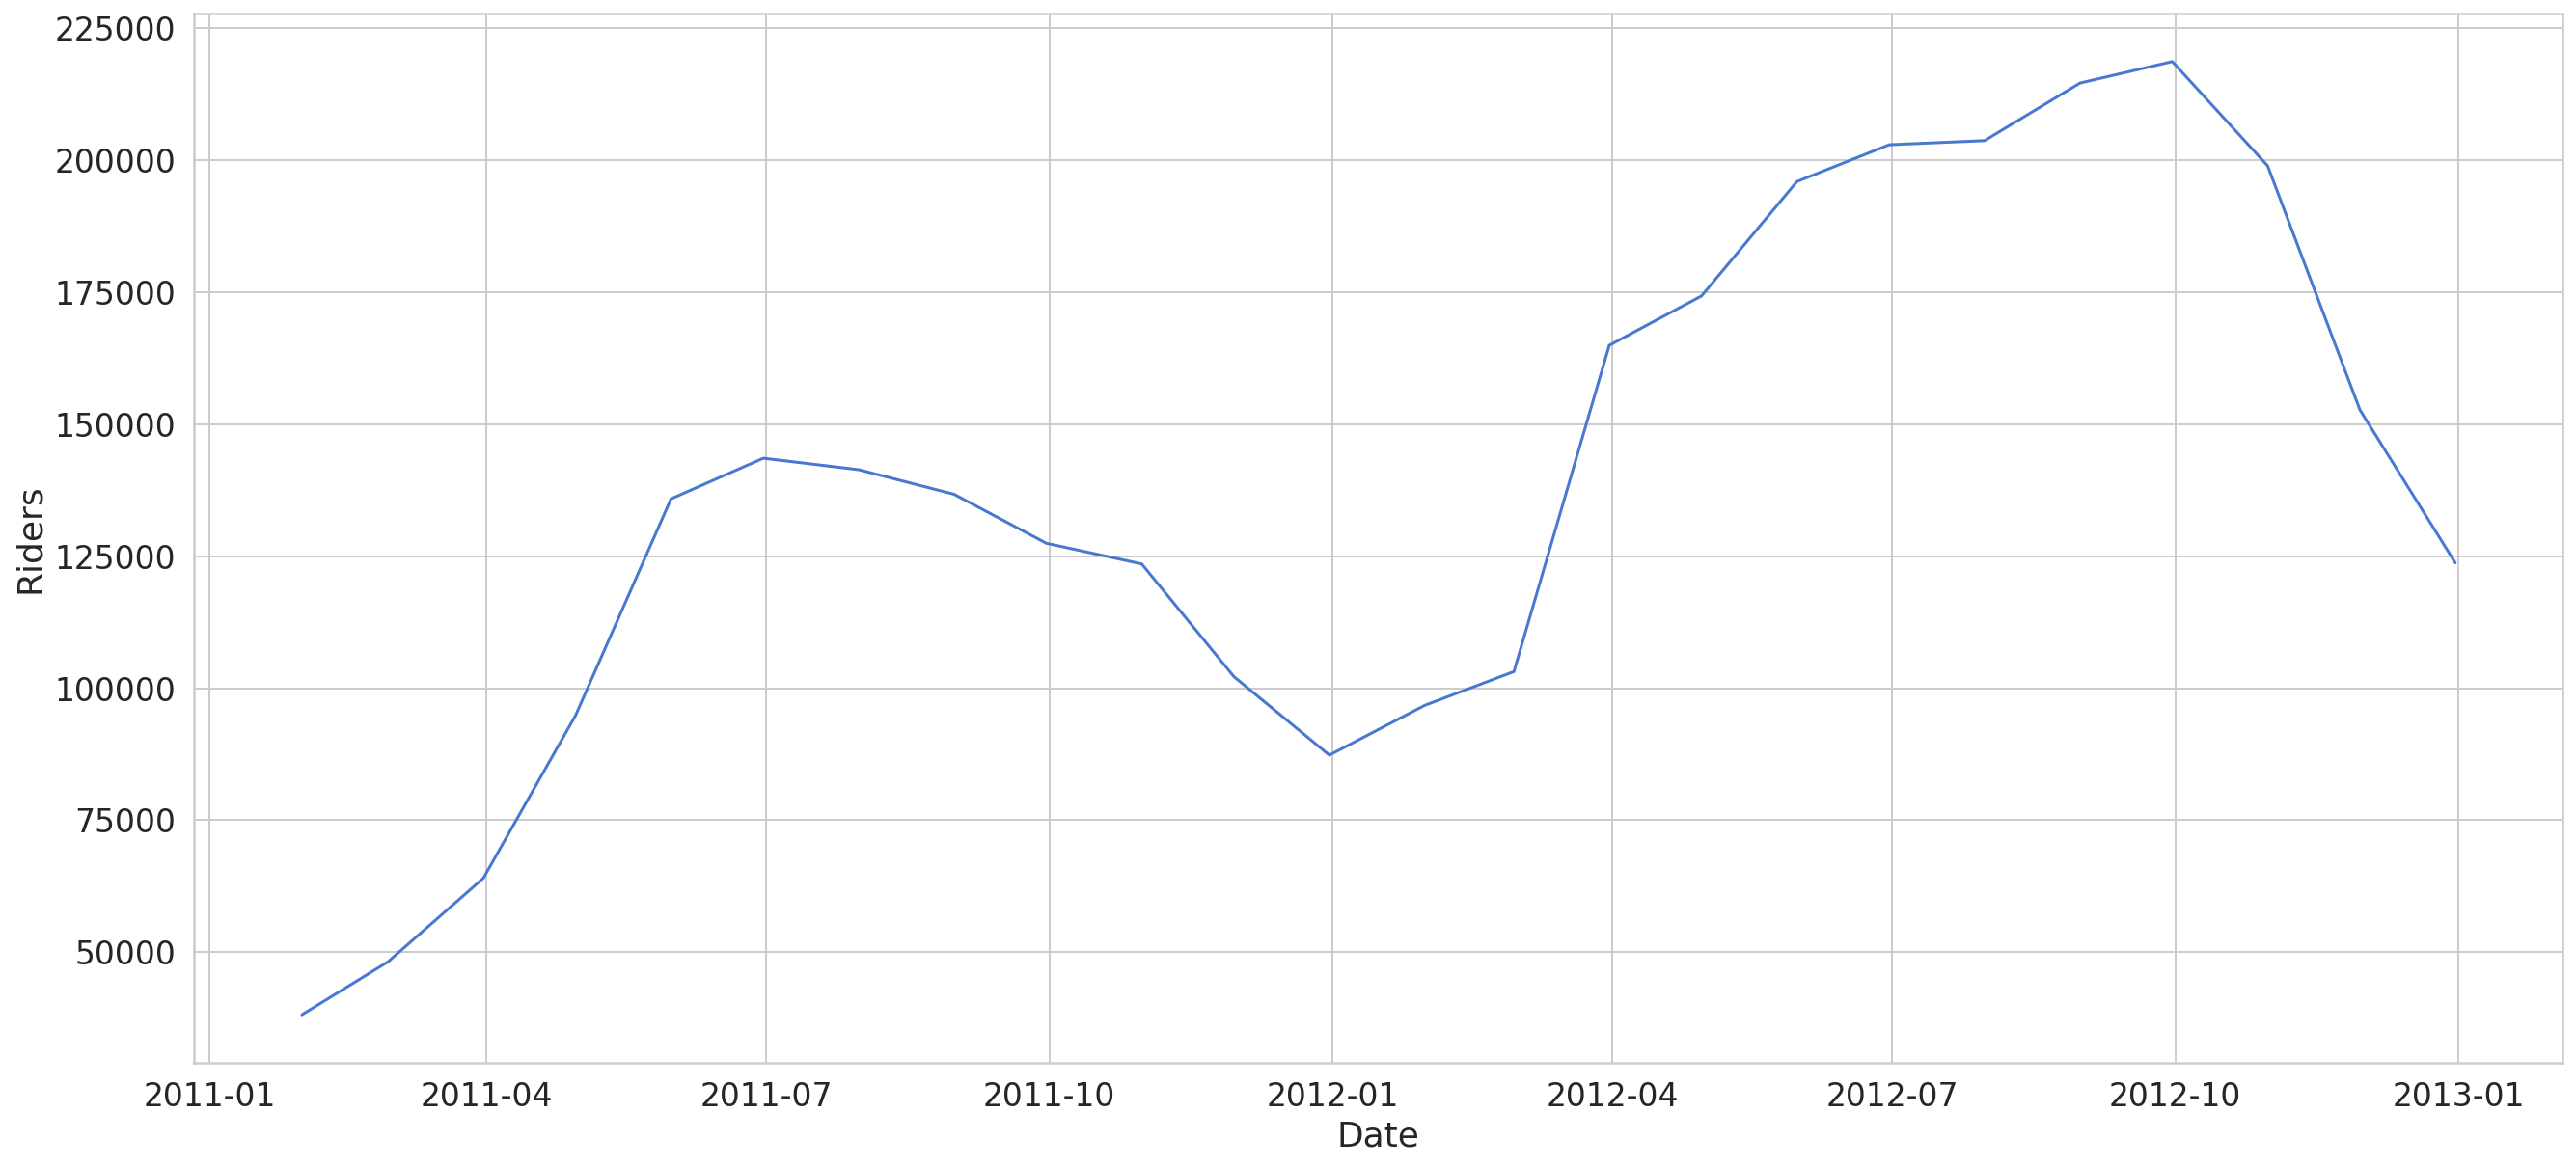

In [ ]:
sns.lineplot(x=bike_by_Month.index, y="Riders", data=bike_by_Month);

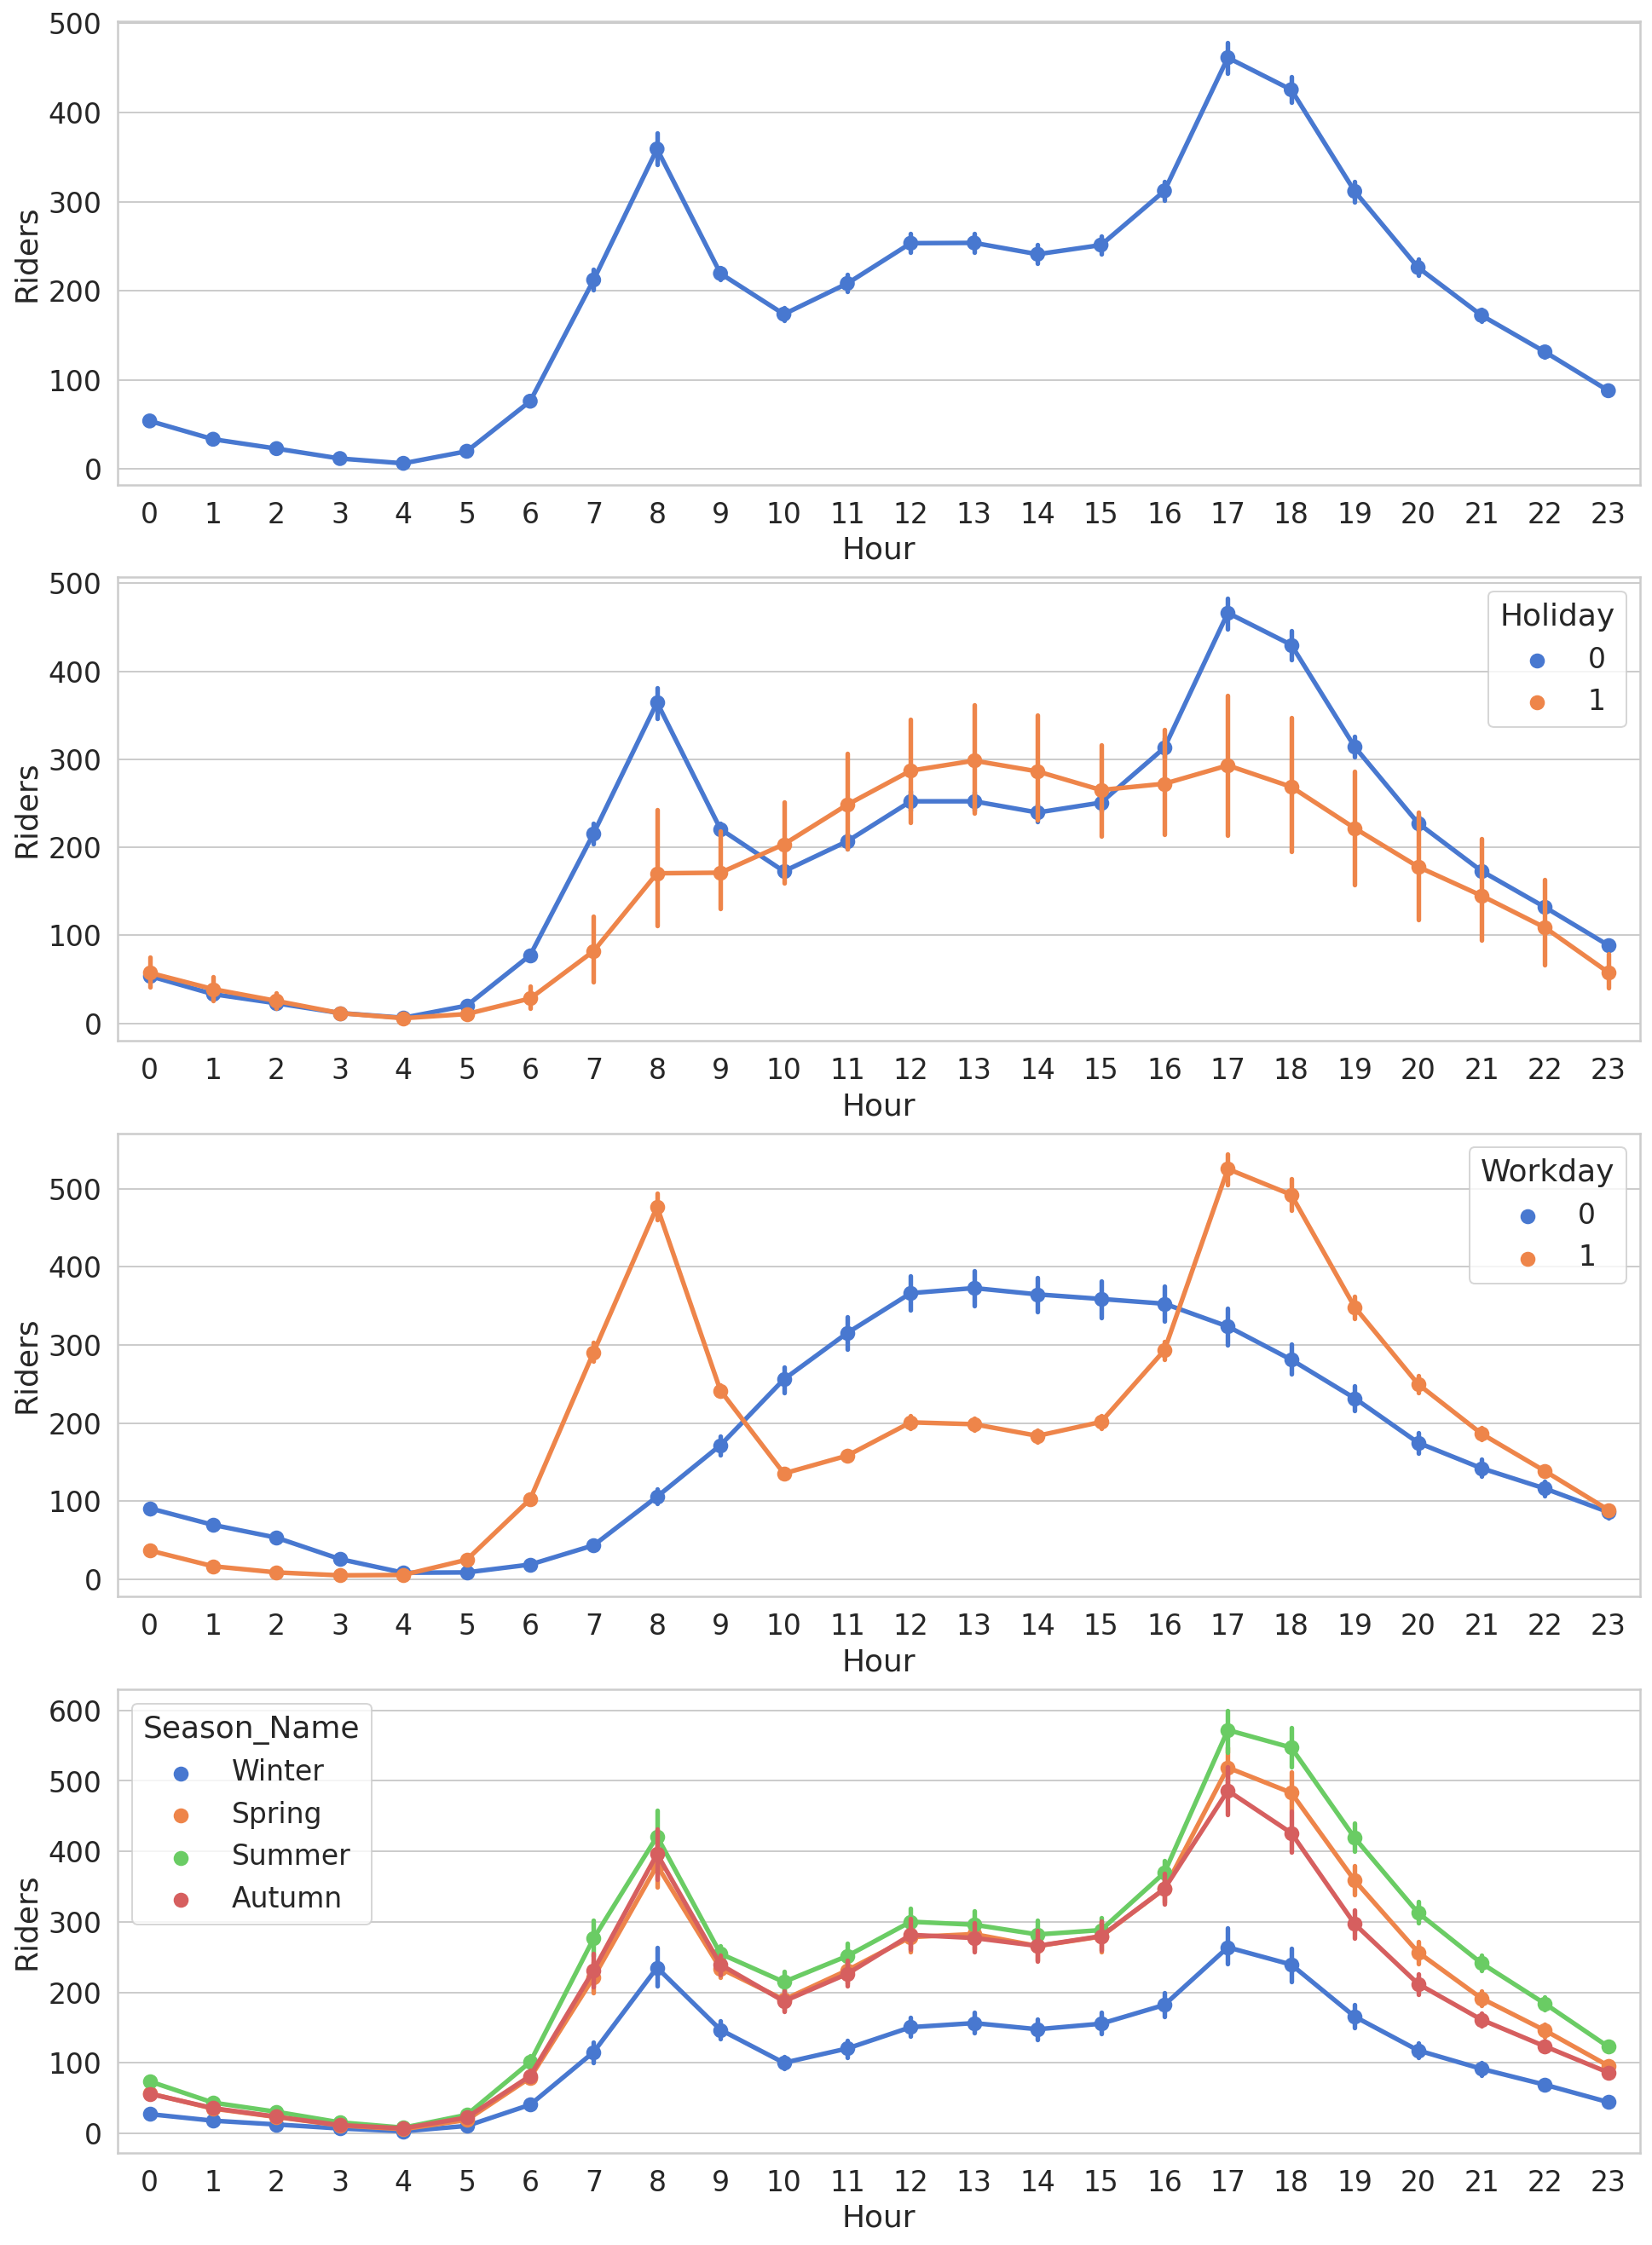

In [ ]:
fig,(ax1, ax2, ax3, ax4)= plt.subplots(nrows=4)
fig.set_size_inches(16, 23)
sns.pointplot(data=bike, x='Hour', y='Riders', ax=ax1)
sns.pointplot(data=bike, x='Hour', y='Riders', hue='Holiday', ax=ax2)
sns.pointplot(data=bike, x='Hour', y='Riders', hue='Workday', ax=ax3)
sns.pointplot(data=bike, x='Hour', y='Riders', hue='Season_Name', ax=ax4);

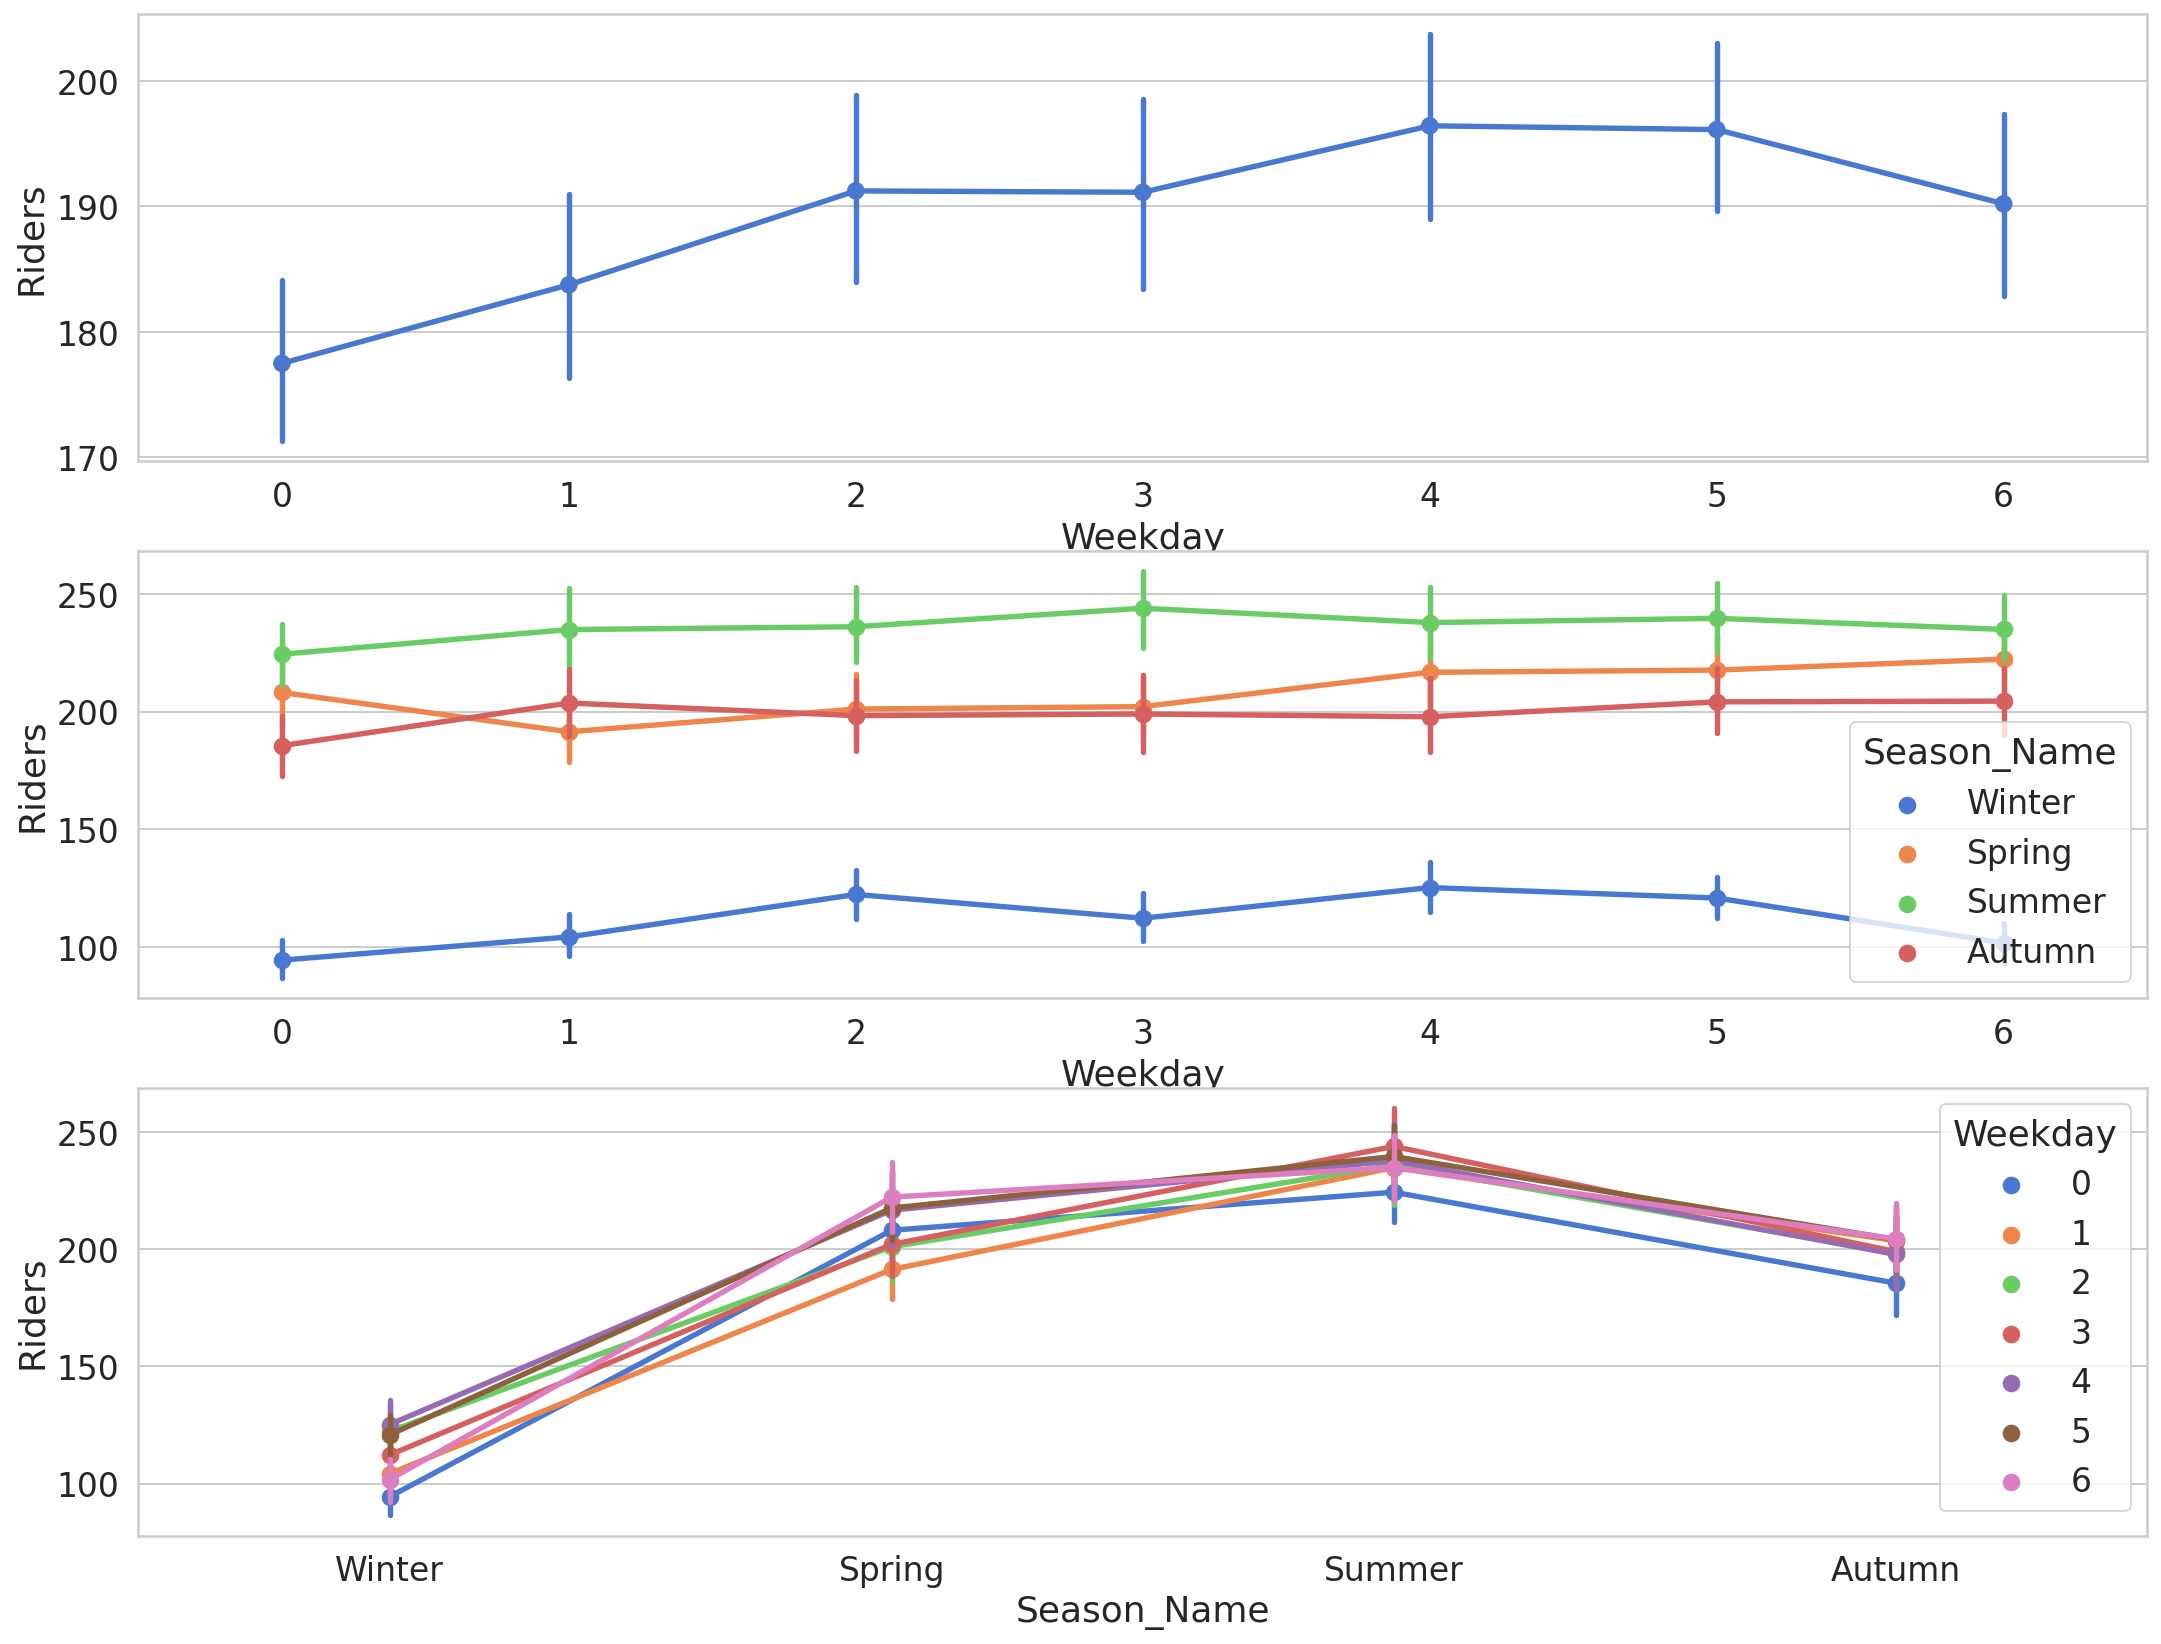

In [ ]:
fig,(ax1, ax2,ax3)= plt.subplots(nrows=3)
fig.set_size_inches(18, 14)

sns.pointplot(data=bike, x='Weekday', y='Riders', ax=ax1)
sns.pointplot(data=bike, x='Weekday', y='Riders', hue='Season_Name', ax=ax2)
sns.pointplot(data=bike, x='Season_Name', y='Riders', hue='Weekday', ax=ax3);

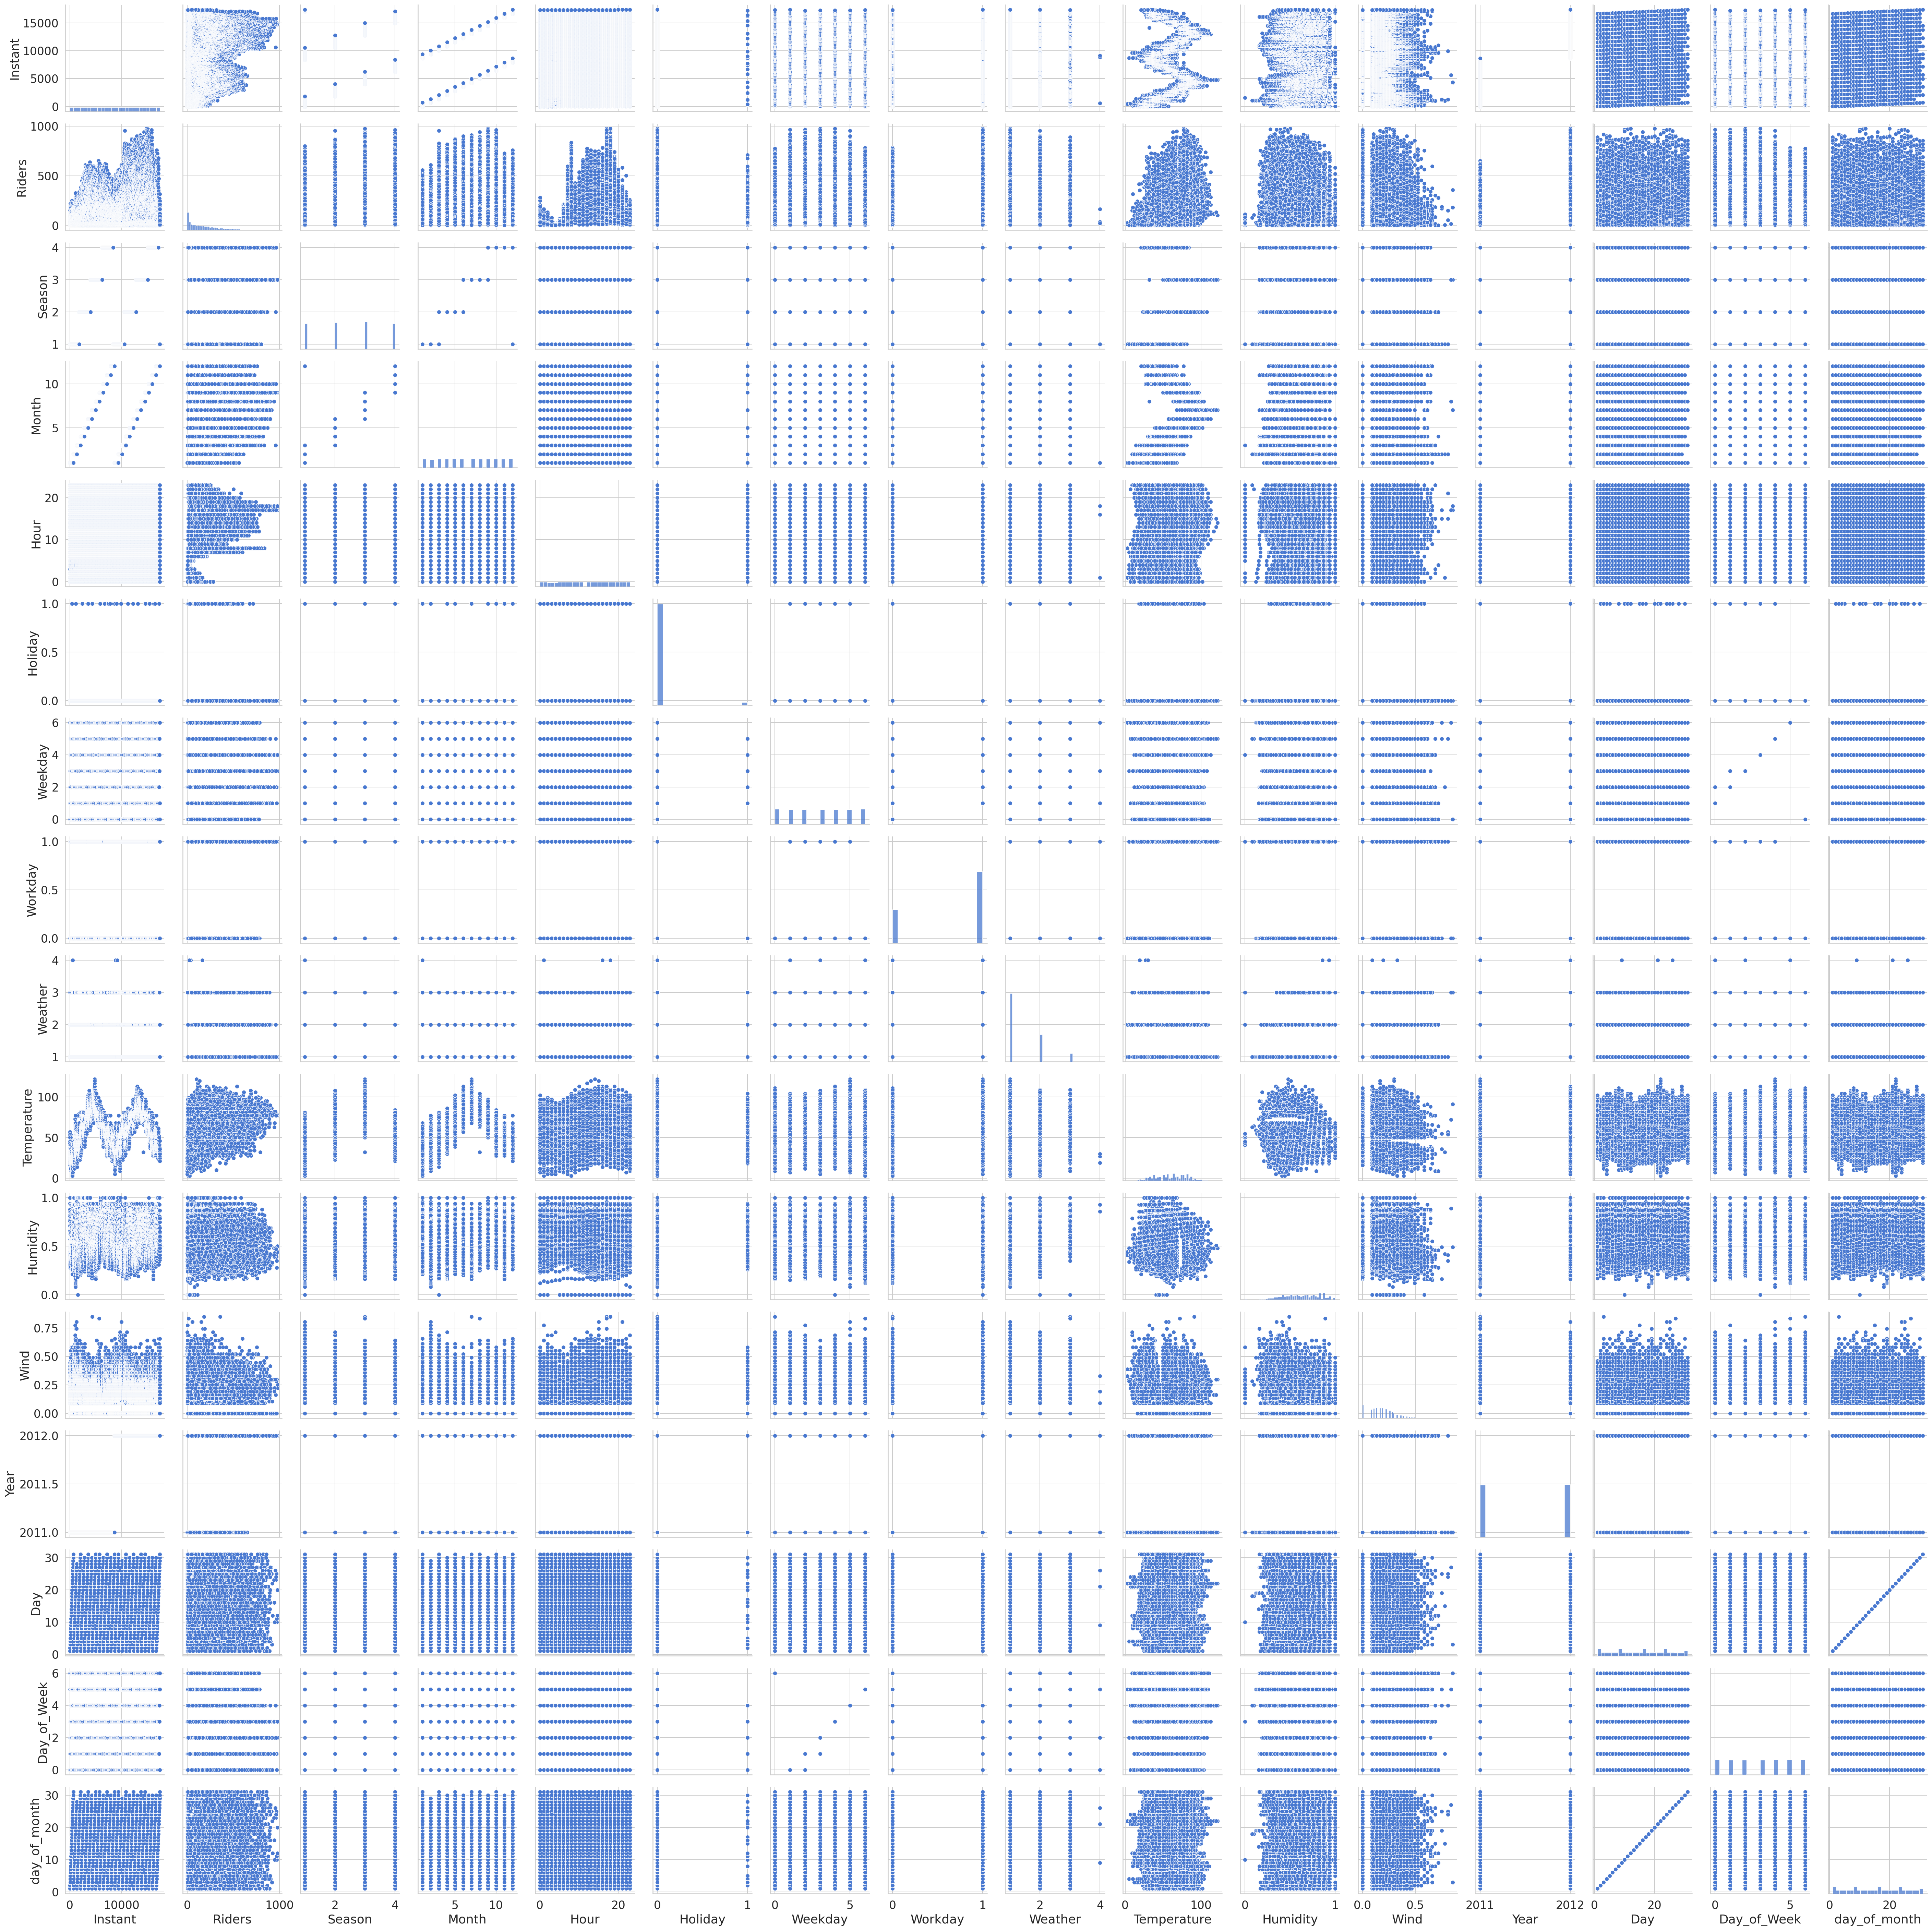

In [435]:
sns.pairplot(bike)

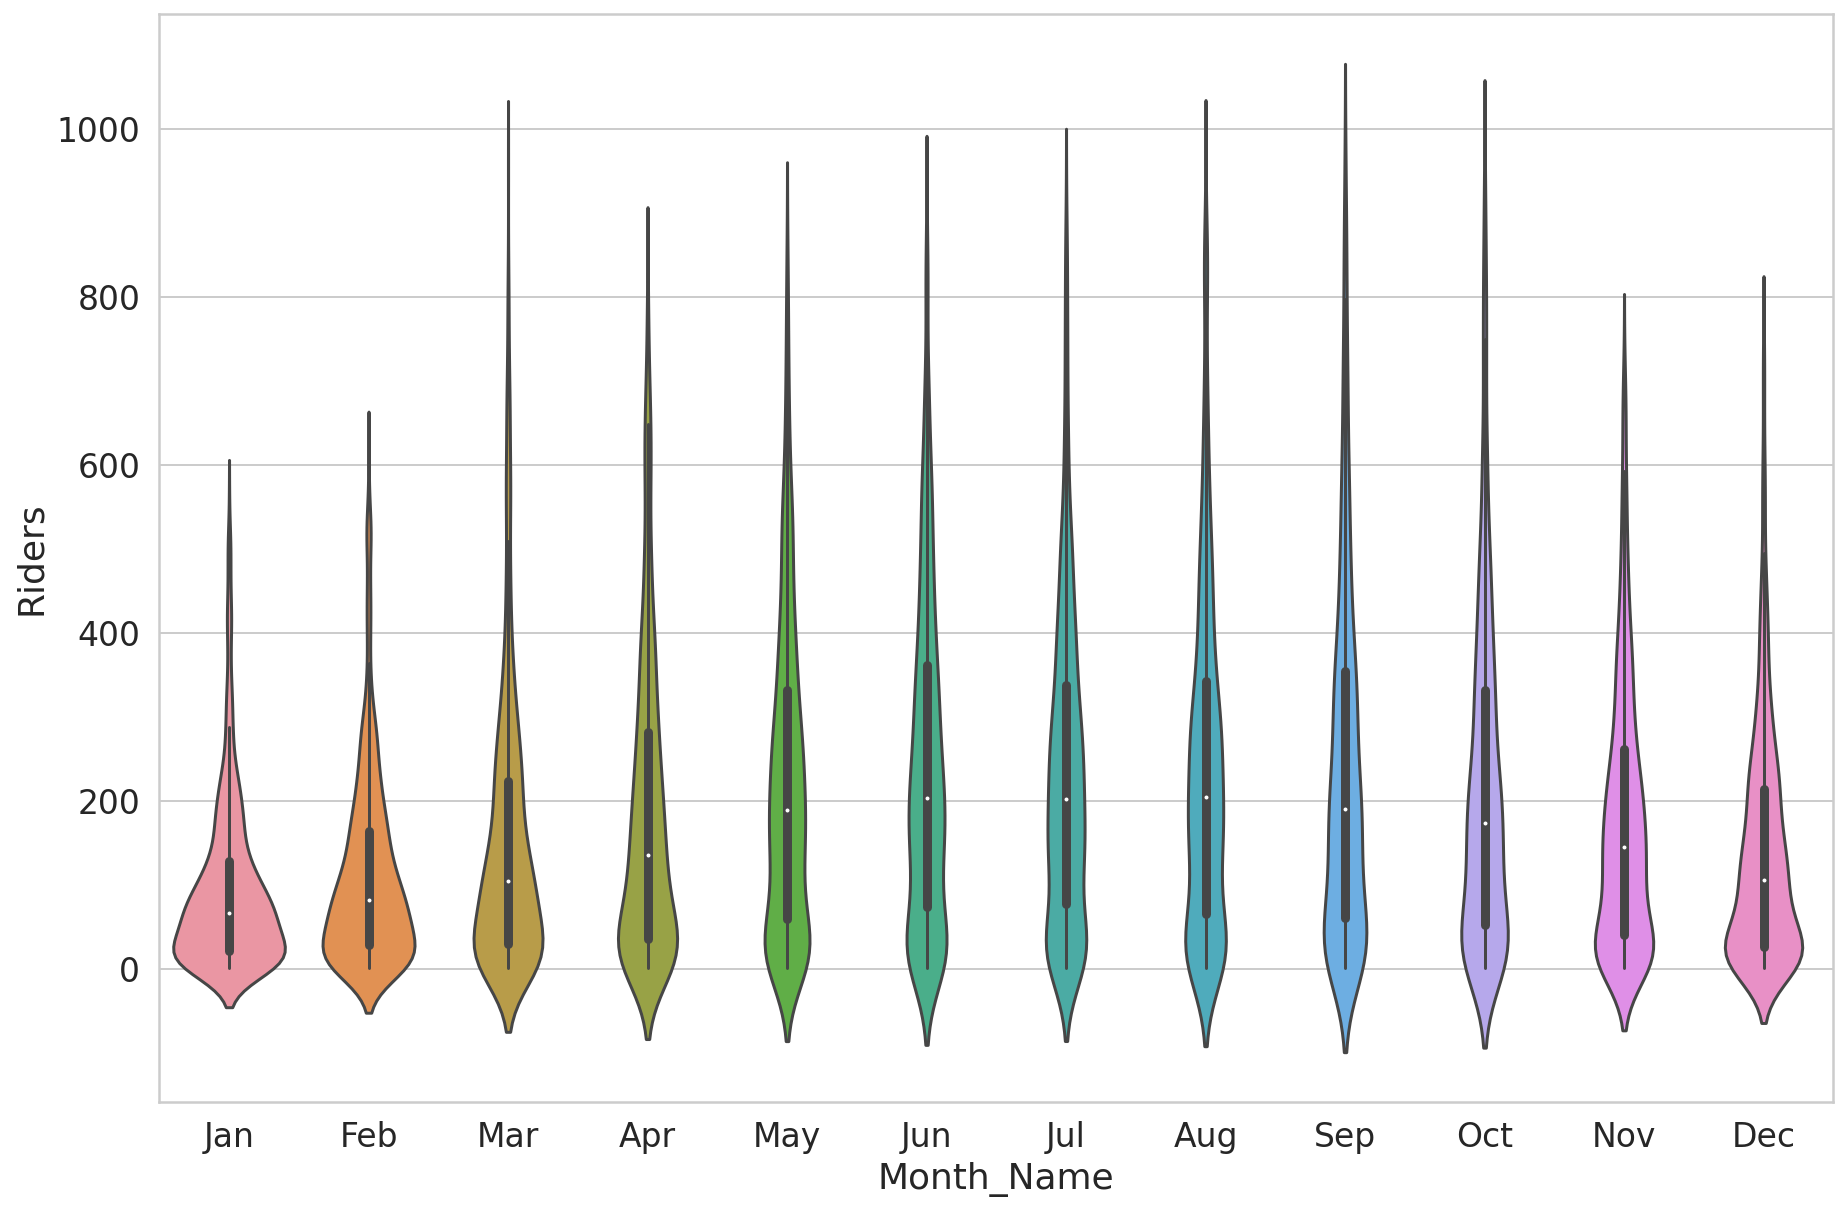

In [441]:
plt.figure(figsize = (15,10))
sns.violinplot(x = bike['Month_Name'] , y = 'Riders', data = bike);

In [445]:
sns.lmplot(data=bike, x="Weekday", y="Riders", col="Hour", hue="Temperature")

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 89.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 88.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 88.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 89.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 90.4% of the points cannot be placed; y

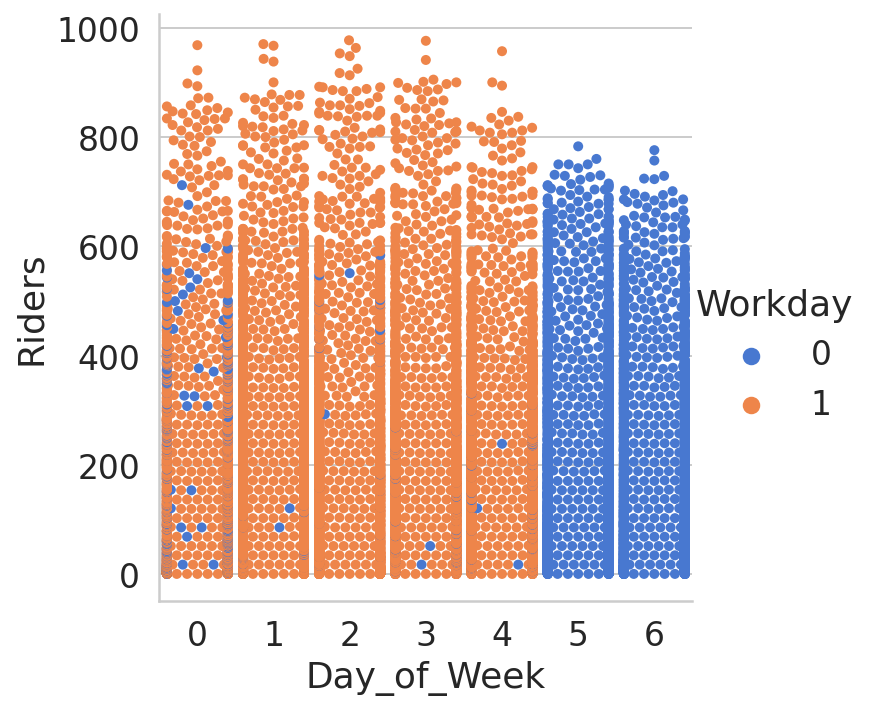

In [444]:
sns.catplot(data=bike, kind="swarm", x="Day_of_Week", y="Riders", hue="Workday")